<a href="https://colab.research.google.com/github/MyPham1207/Python_for_ML/blob/main/Assignments/Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

Mounted at /content/drive


#1. 1-Linear Regression

In [2]:
data = pd.read_csv('/content/drive/MyDrive/School/Python_for_ML/Assignment_8/Data/Salary_Data.csv')
# shuffle the data just for randomness
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,YearsExperience,Salary
0,6.0,93940.0
1,3.2,64445.0
2,3.2,54445.0
3,10.5,121872.0
4,8.2,113812.0


In [3]:
# Split the data
n_splits = 5
kf = KFold(n_splits)
train_index = []
test_index = []
for train, test in kf.split(data):
  train_index.append(train)
  test_index.append(test)

In [4]:
# Take train data and test data from index above
train_data = []
test_data = []
for i in range(n_splits):
  train_data.append(data.iloc[train_index[i]])
  test_data.append(data.iloc[test_index[i]])

train_data[0].head()

,YearsExperience,Salary
6,1.3,46205.0
7,2.0,43525.0
8,6.8,91738.0
9,4.0,56957.0
10,4.1,57081.0


In [5]:
# Normalize the data, fit train and transform train, test
norm_train_data = []
norm_test_data = []
for i in range(n_splits): 
  scaler = MinMaxScaler()
  transformer = scaler.fit(train_data[i])
  train_temp = pd.DataFrame(transformer.transform(train_data[i]), columns=train_data[i].columns, index=train_data[i].index) 
  test_temp = pd.DataFrame(transformer.transform(test_data[i]), columns=test_data[i].columns, index=test_data[i].index)
  norm_train_data.append(train_temp)
  norm_test_data.append(train_temp)

norm_train_data[0].head()

,YearsExperience,Salary
6,0.023529,0.106944
7,0.105882,0.073121
8,0.670588,0.681580
9,0.341176,0.242636
10,0.352941,0.244201


In [6]:
# This function will help me see my hypotasis line
def plot(Xtest, ytest, ypred):
  plt.scatter(Xtest, ytest, color="black")
  plt.plot(Xtest, ypred, color="blue", linewidth=3)

  plt.xticks(())
  plt.yticks(())

  plt.show()

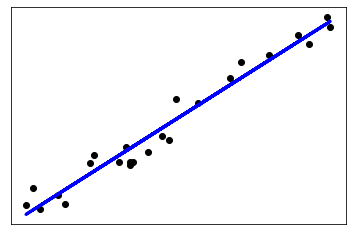

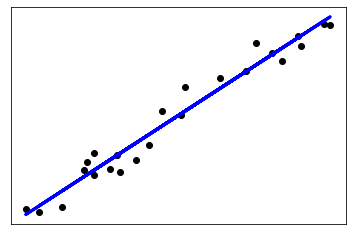

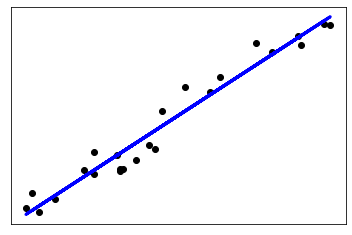

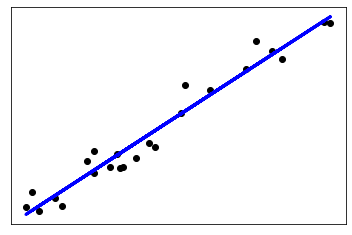

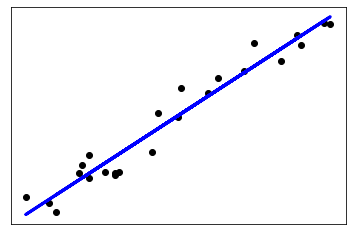

Average Mean Squared Error:  0.004461886129173163


In [7]:
# For regression problem I use mean_squared_error to calculate the lost
error = 0
model = LinearRegression()
for i in range(n_splits):
  y_pred = model.fit(norm_train_data[i][['YearsExperience']], np.ravel(norm_train_data[i][['Salary']])).predict(norm_test_data[i][['YearsExperience']])
  y_test = np.ravel(norm_test_data[i][['Salary']])
  plot(norm_test_data[i][['YearsExperience']], y_test, y_pred)
  err = mean_squared_error(y_test, y_pred)
  error += err
print('Average Mean Squared Error: ', error / n_splits)

#2. N-Linear Regression

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
data = pd.read_csv('/content/drive/MyDrive/School/Python_for_ML/Assignment_8/Data/50_Startups.csv')
# shuffle the data just for randomness
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,44069.95,51283.14,197029.42,California,89949.14
1,78013.11,121597.55,264346.06,California,126992.93
2,142107.34,91391.77,366168.42,Florida,166187.94
3,114523.61,122616.84,261776.23,New York,129917.04
4,162597.70,151377.59,443898.53,California,191792.06


In [10]:
# Split the data
n_splits = 5
kf = KFold(n_splits)
train_index = []
test_index = []
for train, test in kf.split(data):
  train_index.append(train)
  test_index.append(test)

In [11]:
train_data = []
test_data = []
for i in range(n_splits):
  train_data.append(data.iloc[train_index[i]])
  test_data.append(data.iloc[test_index[i]])

test_data[0].head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,44069.95,51283.14,197029.42,California,89949.14
1,78013.11,121597.55,264346.06,California,126992.93
2,142107.34,91391.77,366168.42,Florida,166187.94
3,114523.61,122616.84,261776.23,New York,129917.04
4,162597.70,151377.59,443898.53,California,191792.06


In [12]:
# As you can see, my data have 'State' column contain string value, 
# I have to turn it to number but I can't make it comparable, 
# that's why I encode each value to one hot vector
for i in range(n_splits):
  one_hot = OneHotEncoder(handle_unknown='ignore')
  one_hot = one_hot.fit(train_data[i][['State']])

  # Set index=train_index[i] to make sure the rows in train_temp (which contain one hot vector of state column of train_data[i]) 
  # correspond to ones in train_data[i]
  train_temp = pd.DataFrame(one_hot.transform(train_data[i][['State']]).toarray(), index=train_index[i])
  train_temp.columns = list(one_hot.categories_[0])
  # These 2 lines just to replace 'State' column with one_hot columns
  train_temp = pd.concat((train_data[i][['R&D Spend', 'Administration', 'Marketing Spend']], train_temp), axis=1)
  train_data[i] = pd.concat((train_temp, train_data[i][['Profit']]), axis=1)

  test_temp = pd.DataFrame(one_hot.transform(test_data[i][['State']]).toarray(), index=test_index[i])
  test_temp.columns = list(one_hot.categories_[0])
  test_temp = pd.concat((test_data[i][['R&D Spend', 'Administration', 'Marketing Spend']], test_temp), axis=1)
  test_data[i] = pd.concat((test_temp, test_data[i][['Profit']]), axis=1)

test_data[0].head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
0,44069.95,51283.14,197029.42,1.0,0.0,0.0,89949.14
1,78013.11,121597.55,264346.06,1.0,0.0,0.0,126992.93
2,142107.34,91391.77,366168.42,0.0,1.0,0.0,166187.94
3,114523.61,122616.84,261776.23,0.0,0.0,1.0,129917.04
4,162597.70,151377.59,443898.53,1.0,0.0,0.0,191792.06


In [13]:
norm_train_data = []
norm_test_data = []
for i in range(n_splits): 
  scaler = MinMaxScaler()
  transformer = scaler.fit(train_data[i])
  train_temp = pd.DataFrame(transformer.transform(train_data[i]), columns=train_data[i].columns, index=train_data[i].index) 
  test_temp = pd.DataFrame(transformer.transform(test_data[i]), columns=test_data[i].columns, index=test_data[i].index)
  norm_train_data.append(train_temp)
  norm_test_data.append(train_temp)

norm_test_data[0].head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
10,0.436093,0.581513,0.748613,0.0,0.0,1.0,0.508654
11,0.788018,0.716464,0.686493,0.0,1.0,0.0,0.794407
12,0.142976,0.339539,0.313705,1.0,0.0,0.0,0.319951
13,0.233194,0.238643,0.370931,1.0,0.0,0.0,0.373489
14,0.000000,0.498392,0.095749,1.0,0.0,0.0,0.000000


In [14]:
col = list(train_data[0].columns)
X_tag = col[0:len(col) - 1]
y_tag = [col[len(col) - 1]]
X_tag, y_tag

(['R&D Spend',
  'Administration',
  'Marketing Spend',
  'California',
  'Florida',
  'New York'],
 ['Profit'])

In [15]:
error = 0
model = LinearRegression()
for i in range(n_splits):
  y_pred = model.fit(norm_train_data[i][X_tag], np.ravel(norm_train_data[i][y_tag])).predict(norm_test_data[i][X_tag])
  y_test = np.ravel(norm_test_data[i][y_tag])
  err = mean_squared_error(y_test, y_pred)
  error += err
print('Average Mean Squared Error: ', error / n_splits)

Average Mean Squared Error:  0.002491978290562788
